Example fit for the usage of iminuit

In [17]:
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 20
import numpy as np

Data 

In [18]:
x = np.array([0.2,0.4,0.6,0.8,1.,1.2,1.4,1.6,1.8,2.,2.2,2.4,2.6,2.8,3.,3.2,3.4,3.6,3.8,4.],dtype='d')
dy = np.array([0.04,0.021,0.035,0.03,0.029,0.019,0.024,0.018,0.019,0.022,0.02,0.025,0.018,0.024,0.019,0.021,0.03,0.019,0.03,0.024 ], dtype='d')
y = np.array([1.792,1.695,1.541,1.514,1.427,1.399,1.388,1.270,1.262,1.228,1.189,1.182,1.121,1.129,1.124,1.089,1.092,1.084,1.058,1.057 ], dtype='d')

Define fit functions -an exponential

In [19]:
def xp(a, b , c):
    return a * np.exp(b*x) + c

least-squares function: sum of data residuals squared

In [20]:
def LS(a,b,c):
    return np.sum((y - xp(a,b,c)) ** 2 / dy ** 2)

import Minuit object

In [21]:
from iminuit import Minuit

Minuit instance using LS function to minimize

In [22]:
#m = Minuit(LS,pedantic=False)
LS.errordef = Minuit.LEAST_SQUARES
m = Minuit(LS, a=0.9, b=-0.7 , c=0.95 , error_a=1 , error_b=1 , error_c=1 , limit_b=(-1,-0.1), fix_c=True)
m.params

┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    0.9    │    1.0    │            │            │         │         │       │
│ 1 │ b    │   -0.7    │    1.0    │            │            │   -1    │  -0.1   │       │
│ 2 │ c    │     1     │     1     │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

Run migrad , parameter c is now fixed

In [23]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 17.82                      │         Nfcn = 41 (41 total)         │
│ EDM = 0.000198 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.916   │   0.023   │            │            │         │         │       │
│ 1 │ b    │  -0.594   │   0.018   │            │            │   -1    │  -0.1   │       │
│ 2 │ c    │     1     │     1     │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

release fix on "c" and minimize again

In [24]:
m.fixed["c"] = False
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 12.96                      │        Nfcn = 91 (132 total)         │
│ EDM = 5.71e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.903   │   0.026   │            │            │         │         │       │
│ 1 │ b    │   -0.72   │   0.06    │            │            │   -1    │  -0.1   │       │
│ 2 │ c    │   1.006   │   0.022   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

Get covariance information

In [25]:
m.hesse()
m.params
m.matrix(correlation=True)
m.matrix()

┌───┬──────────────────────┐
│   │      a      b      c │
├───┼──────────────────────┤
│ a │  0.001 -0.000 -0.000 │
│ b │ -0.000  0.004 -0.001 │
│ c │ -0.000 -0.001  0.000 │
└───┴──────────────────────┘

Copy covariance information to numpy arrays

In [26]:
cor = m.np_matrix(correlation=True)
cov = m.np_matrix()

print (cov)
# print correlation between parameter a and b
print(cor[0, 1])

[[ 6.49202195e-04 -2.93987060e-04 -6.96037643e-05]
 [-2.93987060e-04  3.53097407e-03 -1.19593212e-03]
 [-6.96037643e-05 -1.19593212e-03  4.76430582e-04]]
-0.19417394795849946


Get a 2D contour of the function around the minimum for 2 parameters

return Minos error -0.00268629  , 0.00349823
┌──────────┬───────────────────────┐
│          │           a           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.025   │   0.026   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
return Minos error 0.015994  , -0.00774831
return Minos error 0.0663204  , -0.0562845


(array([-0.83362627, -0.83123343, -0.8288406 , -0.82644777, -0.82405493,
        -0.8216621 , -0.81926927, -0.81687643, -0.8144836 , -0.81209077,
        -0.80969794, -0.8073051 , -0.80491227, -0.80251944, -0.8001266 ,
        -0.79773377, -0.79534094, -0.7929481 , -0.79055527, -0.78816244,
        -0.7857696 , -0.78337677, -0.78098394, -0.7785911 , -0.77619827,
        -0.77380544, -0.7714126 , -0.76901977, -0.76662694, -0.76423411,
        -0.76184127, -0.75944844, -0.75705561, -0.75466277, -0.75226994,
        -0.74987711, -0.74748427, -0.74509144, -0.74269861, -0.74030577,
        -0.73791294, -0.73552011, -0.73312727, -0.73073444, -0.72834161,
        -0.72594878, -0.72355594, -0.72116311, -0.71877028, -0.71637744,
        -0.71398461, -0.71159178, -0.70919894, -0.70680611, -0.70441328,
        -0.70202044, -0.69962761, -0.69723478, -0.69484194, -0.69244911,
        -0.69005628, -0.68766345, -0.68527061, -0.68287778, -0.68048495,
        -0.67809211, -0.67569928, -0.67330645, -0.6

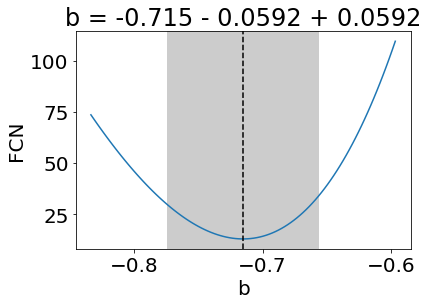

In [27]:
m.minos()
print (m.merrors['a']) # Print control information of parameter a
m.draw_profile('b')

The Minos algorithm uses the profile likelihood method to compute (generally asymmetric) confidence intervals. This can be plotted

return Minos error -0.00268629  , 0.00349823
return Minos error 0.015994  , -0.00774831
return Minos error 0.988189  , 1.01749
return Minos error 1.06021  , 0.964308
return Minos error 1.9791  , 2.04699
return Minos error 2.1372  , 1.91984


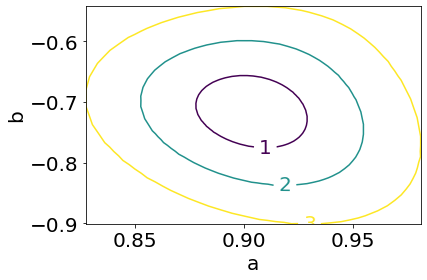

In [29]:
m.draw_mncontour('a', 'b', nsigma = 3)

Access fit results

In [30]:
print(m.values,m.errors)
a_fit = m.values["a"]
b_fit = m.values["b"]
c_fit = m.values["c"]

<ValueView of Minuit at 2444778>
  a: 0.9034861278197065
  b: -0.7151810261106413
  c: 1.0059409448208796 <ErrorView of Minuit at 2444778>
  a: 0.0254794465138097
  b: 0.05922262013629476
  c: 0.021827289851835133


Prepare data to display fitted function 

In [31]:
x_plot = np.linspace( 0.1, 4.5 , 100 )
y_fit =  a_fit * np.exp(b_fit*x_plot) + c_fit 

plot data and fit results with matplotlib

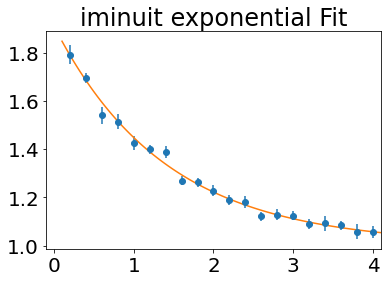

In [32]:
plt.figure()
plt.errorbar(x, y, dy , fmt="o")
plt.plot(x_plot, y_fit)
plt.title("iminuit exponential Fit")
plt.xlim(-0.1, 4.1)
plt.show()